In [1]:
# Imports dos arquivos dtree.py e utils.py
from dtree import growDecisionTreeFrom, prune, classify
from utils import loadCSV, dotgraph

## Árvore de decisão
As árvores de decisão são modelos que utilizam um treinamento supervisionado para a classificação e previsão de dados. 

Para esse trabalho, as perguntas são constituídas de respostas do tipo Verdadeiro ou Falso, criando-se assim uma árvore binária de decisão. Um limiar é estabelecido para divisão dos exemplos de forma binária, ou seja, aqueles exemplos que possuem o valor do atributo maior ou igual que o limiar e aqueles cujo valor do atributo é menor que o limiar estabelecido

Para determinar o quão boa é a condição de teste realizada, ou seja, se o atributo escolhido irá resultar em um maior ganho de informação dentre todos os atributos testados, compara-se o grau de entropia do nó antes da divisão e dos nós gerados após a divisão. O atributo que gerar uma maior diferença é escolhido como condição para teste.

Como condição de parada para geração da árvore observa-se se não há ganho de informação significativo.

In [2]:
# Carrega arquivo csv e obtem um dicionario de atributos e os dados de treinamento
dcHeadings, dataCSV = loadCSV('dataset_reduzido.csv')
type(dataCSV)

pandas.core.frame.DataFrame

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np

# Separando dados de treinamento e de teste
data = dataCSV.iloc[:, 0:-1].values
results = dataCSV.iloc[:, -1].values
trainingData, testData, trainingResults, testResults = train_test_split(data, results, test_size = 0.2)

training = list(np.c_[trainingData, trainingResults])
evaluation = list(np.c_[testData, testResults])

In [4]:
decisionTree = growDecisionTreeFrom(training)  # Geração da árvore de decisão
prune(decisionTree, 0.8)                       # Poda da árvore (método de pós-poda)     

## Resultado
Depois de gerada a árvore de decisão com os dados de treinamento, e realizado a poda, obtemos o seguinte resultado:

In [5]:
import pydotplus

# Gera a visualização da árvore usando Graphviz
dot_data = dotgraph(decisionTree, dcHeadings)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("alunos.png")

True

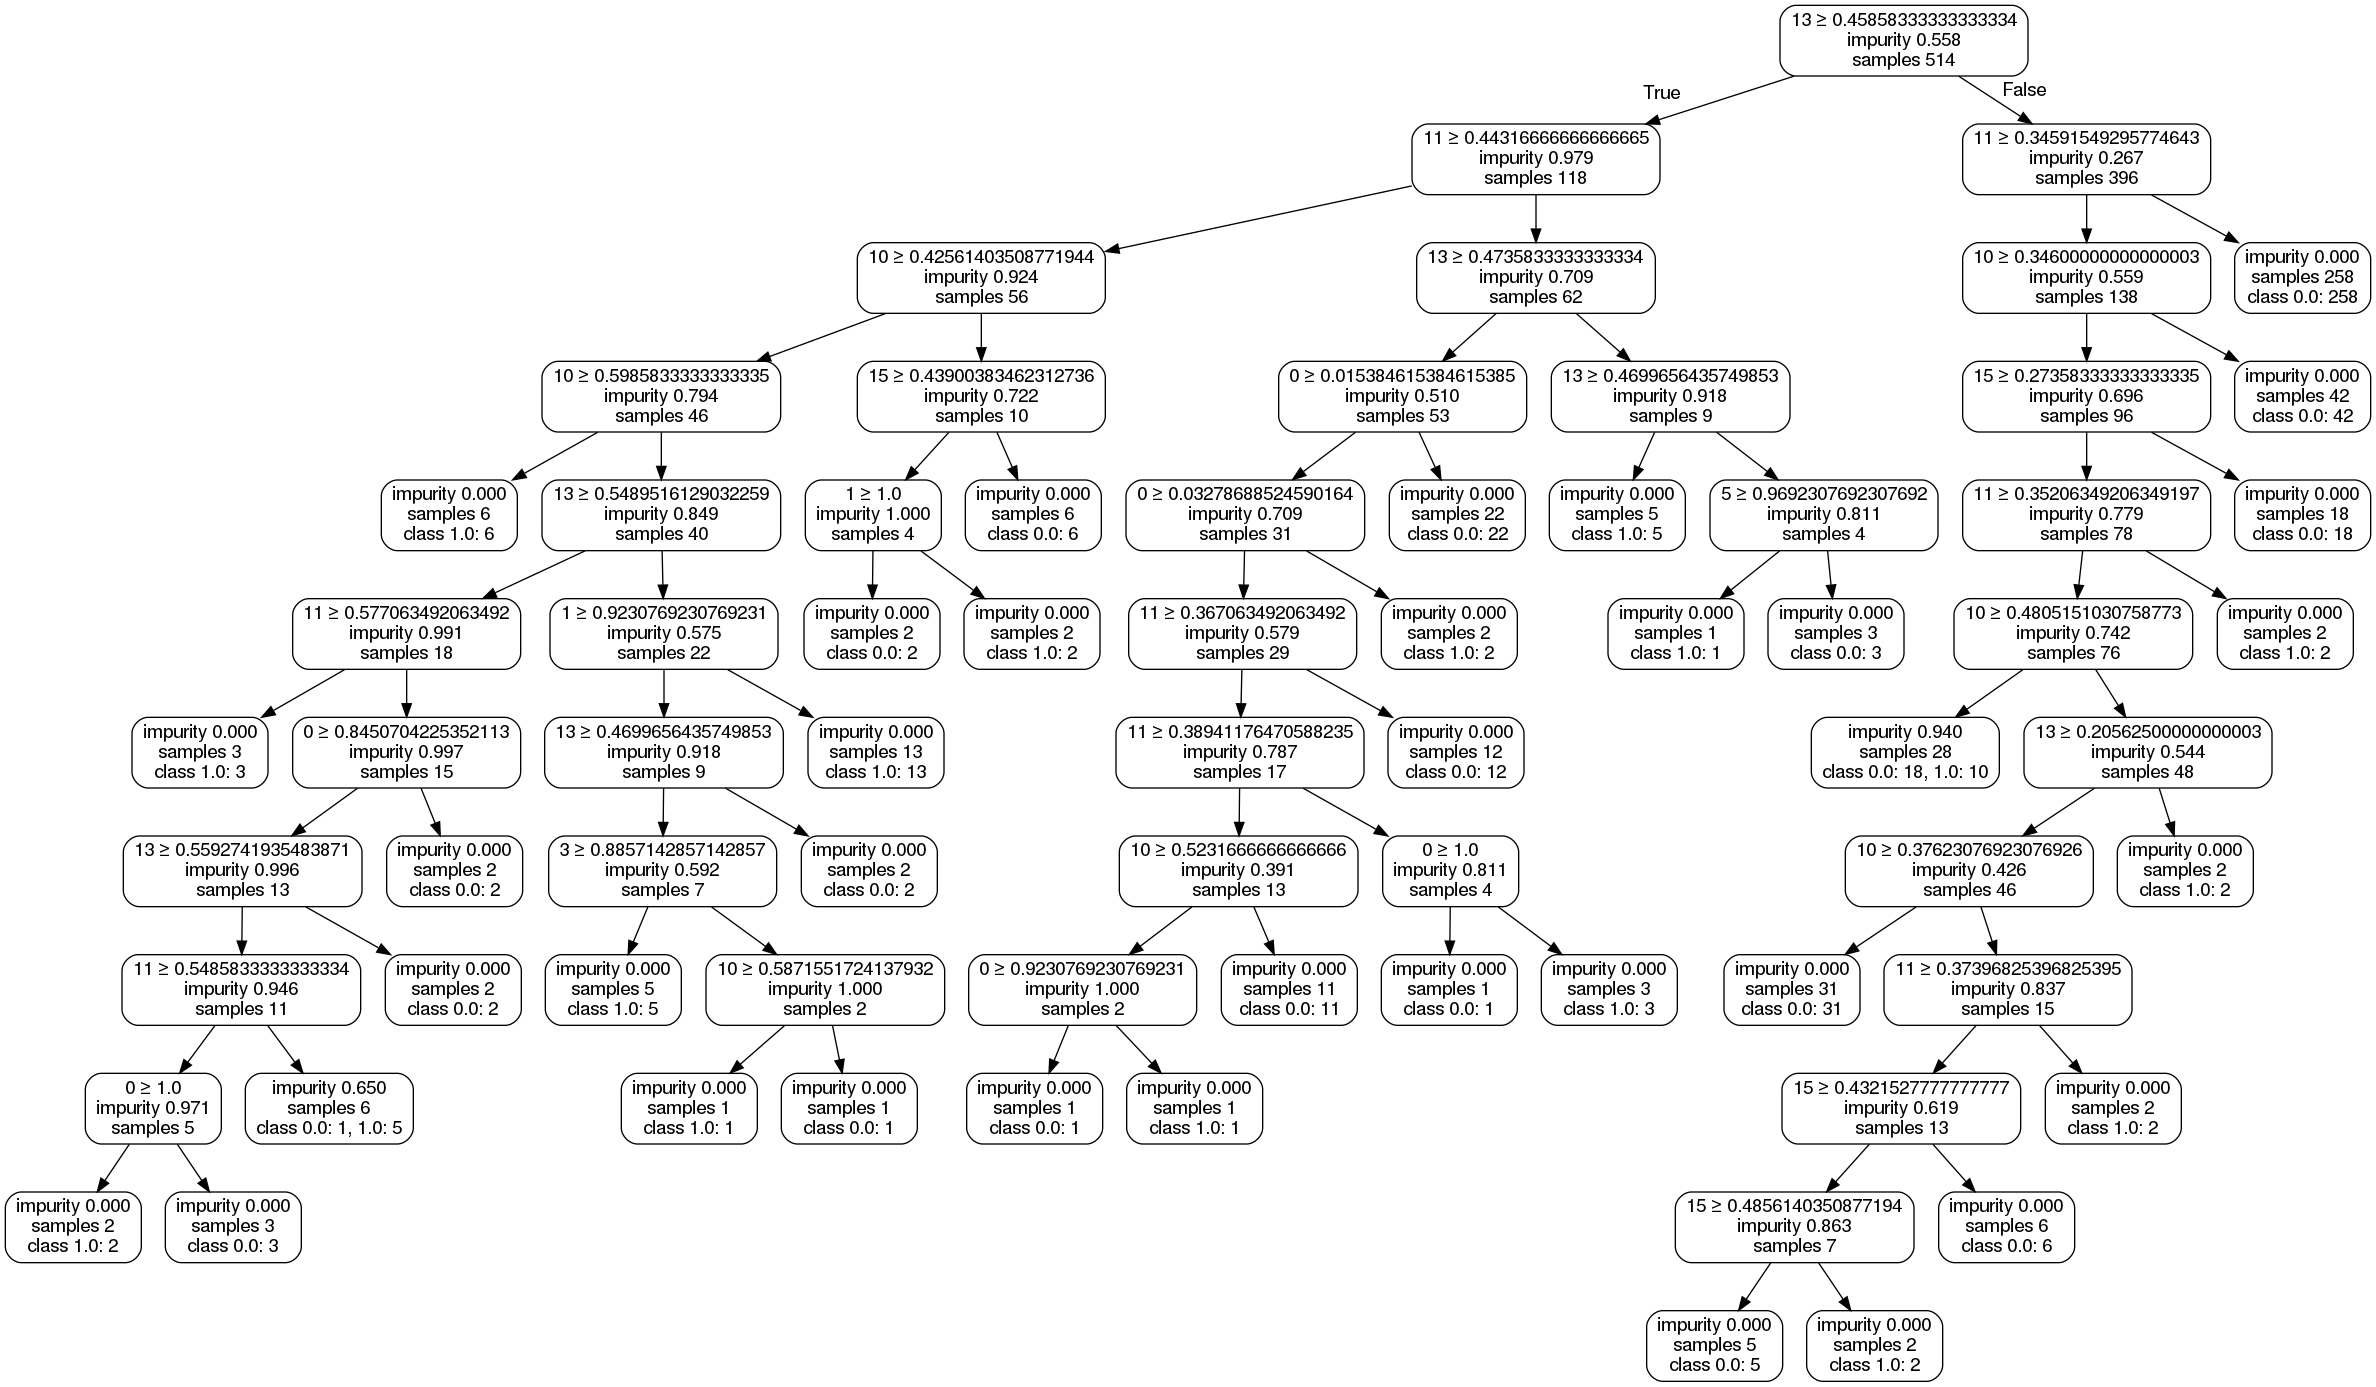

In [6]:
from IPython.display import Image, display

# Mostra a árvore de decisão gerada
display(Image(filename='alunos.png'))

In [7]:
# Realiza teste de acurácia com os dados de teste
print(classify(evaluation, decisionTree, accuracyTest=True))

{'Acertos': 112, 'Erros': 17, 'Acurácia': 0.8682}
